#### Miguel Angel Mendoza Gudarrama - CIDETEC
#### Redes Neuronales Artificiales Avanzadas
#### Profesor: Dr. Carlos Alberto Duchanoy Martínez
#### Preprocesamiento de imágenes de dataset de autos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
from random import shuffle

#### Asignación de etiquetas por cada personalidad

Cheerful	0.96
Open	0.93
Relaxed	0.89
Pretty	0.93
Easy-going	0.94
Cute	0.95****
Dominant	0.89
Obtrusive	0.9
Silly	0.69
Childish	0.91
Untidy	0.78
Idiosyncratic	0.94
Interesting	0.88
Lively	0.91
Provocative	0.92
Modest	0.87
Honest	0.67
Serious	0.95
Aloof	0.91
Boring	0.95

In [ ]:
images = np.load('lote0.npy')

i = 0
output_img = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
##### Data for Car Personality 1
x1_1 = (0.96 + 0.93 + 0.89 + 0.93 + 0.94 + 0.95)
x2_1 = x1_1*7
slope1 = (7-1)/(x2_1 - x1_1)

##### Data for Car Personality 2
x1_2 = (0.94 + 0.92 + 0.88 + 0.91)
x2_2 = x1_2*7
slope2 = (7-1)/(x2_2 - x1_2)

##### Data for Car Personality 3
x1_3 = (0.89 + 0.9)
x2_3 = x1_3*7
slope3 = (7-1)/(x2_3 - x1_3)

##### Data for Car Personality 4
x1_4 = (0.95 + 0.91)
x2_4 = x1_4*7
slope4 = (7-1)/(x2_4 - x1_4)

##### Data for Car Personality 5
x1_5 = (0.95 + 0.67 + 0.87)
x2_5 = x1_5*7
slope5 = (7-1)/(x2_5 - x1_5)

clases_ini1= np.zeros((1,8))
clases_ini2= np.zeros((1,8))
clases_ini3= np.zeros((1,8))
clases_ini4= np.zeros((1,8))
clases_ini5= np.zeros((1,8))
dataset = np.ones((2139,120000))

for lists in range(1,18):
    j = 0
    i = 0
    if (lists == 5 or lists == 13):
        #print ("if",lists)
        pass
    else:
        #print ("else",lists)
        with open('lista' + str(lists) + '.csv') as csvfile:
            rows = csv.reader(csvfile, delimiter=',', quotechar=' ')
            for row in rows:
                if i > 1:
                    #print ('  '.join(row))
                    #####   cheerful             open               relaxed            pretty           easy-going           cute
                    suma1 = int(row[1])*0.96 + int(row[2])*0.93 + int(row[3])*0.89 + int(row[4])*0.93 + int(row[5])*0.94 + int(row[6])*0.95
                    #####   idiosincratic      provocative          interesting        lively
                    suma2 = int(row[7])*0.94 + int(row[8])*0.92 + int(row[9])*0.88 + int(row[10])*0.91
                    #####   dominant            obstrusive
                    suma3 = int(row[11])*0.89 + int(row[12])*0.9
                    #####   boring               aloof
                    suma4 = int(row[13])*0.95 + int(row[14])*0.91
                    #####    serious            honest               modest
                    suma5 = int(row[15])*0.95 + int(row[16])*0.67 + int(row[17])*0.87

                    current_car = np.reshape(images[int(row[0])], (200*200*3))
                    #current_car = np.array(images[int(row[0])])
                    car_personality1 = int(round(suma1*slope1,0))
                    car_personality2 = int(round(suma2*slope2,0))
                    car_personality3 = int(round(suma3*slope3,0))
                    car_personality4 = int(round(suma4*slope4,0))
                    car_personality5 = int(round(suma5*slope5,0))
                    
                    clase1 = np.zeros((8))
                    clase1[car_personality1] = 1
                    clase2 = np.zeros((8))
                    clase2[car_personality2] = 1
                    clase3 = np.zeros((8))
                    clase3[car_personality3] = 1
                    clase4 = np.zeros((8))
                    clase4[car_personality4] = 1
                    clase5 = np.zeros((8))
                    clase5[car_personality5] = 1
                    
                    output_img.append(current_car)
                    label1.append([car_personality1])
                    label2.append([car_personality2])
                    label3.append([car_personality3])
                    label4.append([car_personality4])
                    label5.append([car_personality5])
                i = i+1

(2139, 120000)
(2139, 1)


(array([  0,  85, 291, 534, 664, 401, 141,  23]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

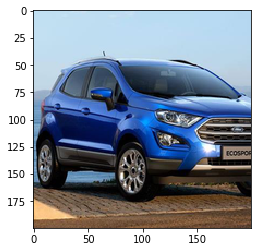

In [3]:
output_img = np.array(output_img)
img_ =  np.reshape(output_img[0], (200,200,3))
plt.imshow(img_)


print(output_img.shape)
"""
label1 = np.array(label1)
label2 = np.array(label2)
label3 = np.array(label3)
label4 = np.array(label4)
label5 = np.array(label5)
print((label1[0]))
print(label1[29])
"""
l = np.array((label1))
print(l.shape)
np.histogram(label1, bins= range(9))

In [4]:
#np.save("label1", label1)
#np.save("label2", label2)
#np.save("label3", label3)
#np.save("label4", label4)
#np.save("label5", label5)
#np.save("dataset_img", output_img)

#### Exploración visual de los datos 

In [5]:
def plot_hist(hist):
    x_axe = np.array([0,1,2,3,4,5,6,7])

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
    fig.subplots_adjust(left=0.1, wspace=0.4, hspace = 0.4)

    # plot time signal:
    axes[0, 0].set_title("Personalidad 1")
    axes[0, 0].bar(x_axe, hist[0][0], color='C0')
    axes[0, 0].set_xlabel("Clases")
    axes[0, 0].set_ylabel("Datos de entrenamiento")

    axes[1, 0].set_title("Personalidad 2")
    axes[1, 0].bar(x_axe, hist[1][0], color='C1')
    axes[1, 0].set_xlabel("Clases")
    axes[1, 0].set_ylabel("Datos de entrenamiento")

    axes[2, 0].set_title("Personalidad 3")
    axes[2, 0].bar(x_axe, hist[2][0], color='C2')
    axes[2, 0].set_xlabel("Clases")
    axes[2, 0].set_ylabel("Datos de entrenamiento")

    axes[0, 1].set_title("Personalidad 4")
    axes[0, 1].bar(x_axe, hist[3][0], color='C3')
    axes[0, 1].set_xlabel("Clases")
    axes[0, 1].set_ylabel("Datos de entrenamiento")

    axes[1, 1].set_title("Personalidad 5")
    axes[1, 1].bar(x_axe, hist[4][0], color='C4')
    axes[1, 1].set_xlabel("Clases")
    axes[1, 1].set_ylabel("Datos de entrenamiento")

    axes[2, 1].set_title("Total")
    axes[2, 1].bar(x_axe, hist[5], color='C5')
    axes[2, 1].set_xlabel("Clases")
    axes[2, 1].set_ylabel("Datos de entrenamiento")

    plt.show()  
    
def create_hist(l1,l2, l3, l4, l5):
    """
    hist1 = np.sum(l1, axis=0)
    hist2 = np.sum(l2, axis=0)
    hist3 = np.sum(l3, axis=0)
    hist4 = np.sum(l4, axis=0)
    hist5 = np.sum(l5, axis=0)
    """
    hist1 = np.histogram(l1, bins= range(9))
    hist2 = np.histogram(l2, bins= range(9))
    hist3 = np.histogram(l3, bins= range(9))
    hist4 = np.histogram(l4, bins= range(9))
    hist5 = np.histogram(l5, bins= range(9))
    hist_total = hist1[0] + hist2[0] + hist3[0] + hist4[0] + hist5[0]
    hist = [hist1,hist2,hist3,hist4,hist5,hist_total]
    hist = np.array(hist)
    
    return hist

    

### Histogramas de datos originales de entrada

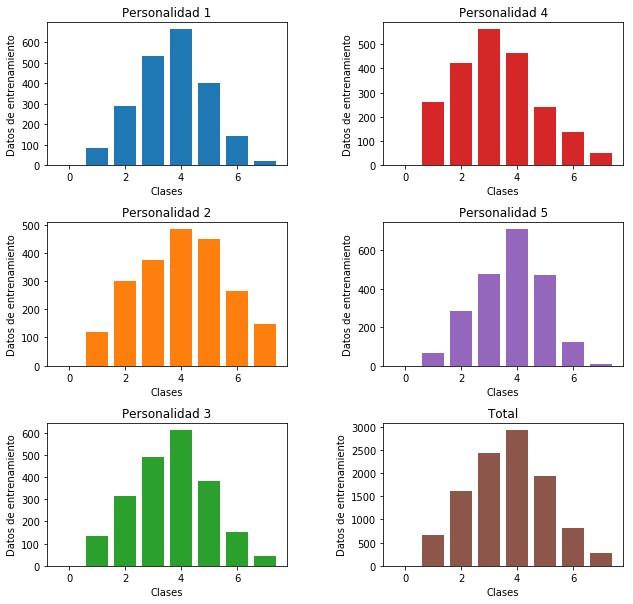

In [6]:
hist = create_hist(label1, label2, label3, label4, label5)
plot_hist(hist)

#### Aumentación de los datos - Balanceo de datos

In [7]:
#deficion de funciones para escalar, rotar, añadir ruido gaussiano
def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def transform_img(img_in):
    img_in = img_in.copy()
    #img_out= sharpen_img(img_in)
    img_out = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)

    img_out[:,:,0] = cv2.equalizeHist(img_out[:,:,0])
    img_out[:,:,1] = cv2.equalizeHist(img_out[:,:,1])
    img_out[:,:,2] = cv2.equalizeHist(img_out[:,:,2])
    
    return img_out[:,:,0]

def random_rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def random_scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:,:]
    return img2

#Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)
lin_img

def augment_img(img):
    img = img.copy()
    img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=random_rotate_img(img)
    img=random_scale_img(img)

    return (img)

Imágenes de entrada


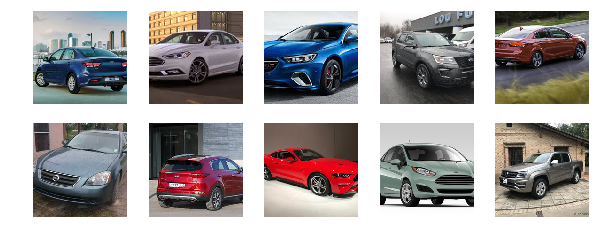

In [8]:
plt.figure(figsize=(10,10))
count = 1
cols = 5
print("Imágenes de entrada")
for _ in range(10):
    plt.subplot(5,cols,count)
    image_resized = np.reshape(output_img[count], (200,200,3))
    plt.imshow(image_resized)
    plt.axis('off')
    count+=1


Imágenes aumentadas


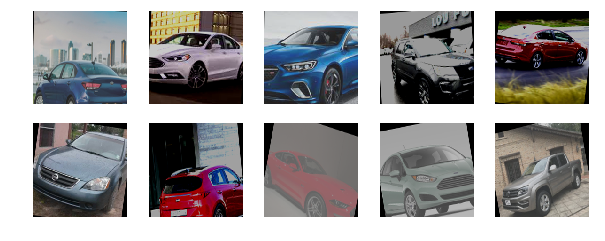

In [9]:
print("Imágenes aumentadas")
plt.figure(figsize=(10,10))
count = 1
cols = 5
for _ in range(10):
    plt.subplot(5,cols,count)
    image_resized = np.reshape(output_img[count], (200,200,3))
    plt.imshow(augment_img(image_resized))
    plt.axis('off')
    count+=1

In [10]:
label_1_augmented = []
label_2_augmented = []
label_3_augmented = []
label_4_augmented = []
label_5_augmented = []
img_1_augmented = []
for i in range(len(output_img)-1):
    if label3[i][0] != 4:
    #if np.argmax(label3[i]) != 3:
        #if np.argmax(label5[i]) == 6 or np.argmax(label4[i]) == 6 or np.argmax(label1[i]) == 6  or np.argmax(label3[i]) == 6:
        if label5[i][0] == 7 or label4[i][0] == 7 or label1[i][0] == 7 or label3[i][0] == 7:
            for j in range (20):
                img_1_= augment_img(images[i])
                img_1_augmented.append(np.reshape(img_1_, (200*200*3)))
                label_1_augmented.append(label1[i])
                label_2_augmented.append(label2[i])
                label_3_augmented.append(label3[i])
                label_4_augmented.append(label4[i])
                label_5_augmented.append(label5[i])

### Histograma de dataset aumentado, para personalidad 2

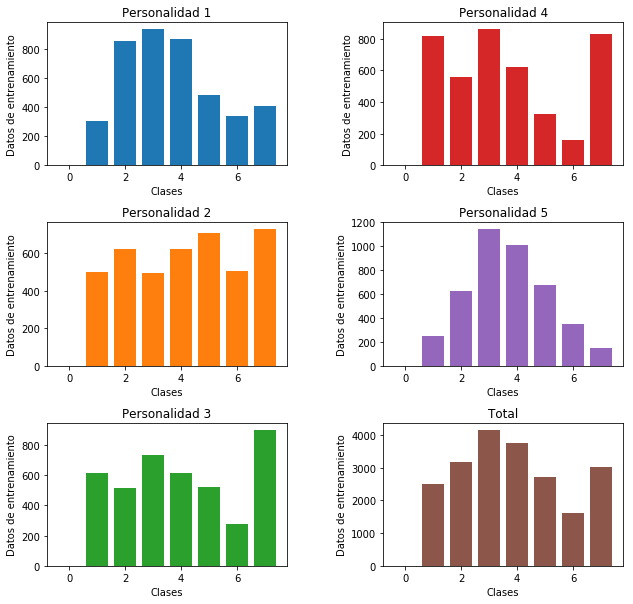

In [11]:
img_1_augmented = np.array(img_1_augmented)

label_1_augmented = np.append(label_1_augmented, label1, axis=0)
label_2_augmented = np.append(label_2_augmented, label2, axis=0)
label_3_augmented = np.append(label_3_augmented, label3, axis=0)
label_4_augmented = np.append(label_4_augmented, label4, axis=0)
label_5_augmented = np.append(label_5_augmented, label5, axis=0)

hist_augmented = create_hist(label_1_augmented, label_2_augmented, label_3_augmented, label_4_augmented, label_5_augmented)
plot_hist(hist_augmented)

In [12]:
print("Tamaño de dataset original: \n",output_img.shape)
print("Tamaño de dataset aumentado: \n",img_1_augmented.shape)
output_augmented_img = np.concatenate((output_img, img_1_augmented))
print("Tamaño de dataset final: \n", output_augmented_img.shape)

print("Tamaño de etiquetas: \n",label_2_augmented.shape)

Tamaño de dataset original: 
 (2139, 120000)
Tamaño de dataset aumentado: 
 (2040, 120000)
Tamaño de dataset final: 
 (4179, 120000)
Tamaño de etiquetas: 
 (4179, 1)


In [13]:
# se unen todas las etiquetas
labels_total = np.hstack((label_1_augmented, label_2_augmented, label_3_augmented, label_4_augmented, label_5_augmented))
labels_total = np.array(labels_total)

# union de dataset final con etiquetas para hacer shuffle
img_to_shuffle = list(zip(output_augmented_img, labels_total))
shuffle(img_to_shuffle)
data_img_output, labels_output = zip(*img_to_shuffle) 
data_img_output = np.array(data_img_output)
labels_output = np.array(labels_output)
print(data_img_output.shape)
print(labels_output.shape)


(4179, 120000)
(4179, 5)


In [14]:
# se guardan la imagenes y las etiquetas
#np.save("dataset__lbs", labels_output)
#np.save("dataset__imgs", data_img_output)

In [16]:
"""
a = np.array([[1,2,3],[4,5,6],[7,8,9],[7,4,1]])
print(a.shape)
print("a: \n", a)
a2 = np.array([[9],[5],[1],[7]])
a3 = np.hstack((a,a2))

a_slide = a3[0:,1:]

print("a_slide: \n", a_slide)

np.random.shuffle(a3)
print("a3: \n",a3)
c = np.array(([6,9,8,7],))
print(c.shape)
a4 = np.concatenate((a3,c),axis = 0)
a4
"""

'\na = np.array([[1,2,3],[4,5,6],[7,8,9],[7,4,1]])\nprint(a.shape)\nprint("a: \n", a)\na2 = np.array([[9],[5],[1],[7]])\na3 = np.hstack((a,a2))\n\na_slide = a3[0:,1:]\n\nprint("a_slide: \n", a_slide)\n\nnp.random.shuffle(a3)\nprint("a3: \n",a3)\nc = np.array(([6,9,8,7],))\nprint(c.shape)\na4 = np.concatenate((a3,c),axis = 0)\na4\n'

In [17]:
"""
a = np.array([1,2,3])
print(a.shape)
zeros1 = np.zeros((3,7))

zeros1[np.arange(3), a] = 1
zeros1
"""

'\na = np.array([1,2,3])\nprint(a.shape)\nzeros1 = np.zeros((3,7))\n\nzeros1[np.arange(3), a] = 1\nzeros1\n'

In [18]:
"""
a = np.array([1,2,3,4,5,6,7,8])
b = np.array([1,2,3,4,5,6,7,8])

c = (list(zip(a,b)))
shuffle(c)
aa, bb = zip(*c)
print(aa,bb)
"""

'\na = np.array([1,2,3,4,5,6,7,8])\nb = np.array([1,2,3,4,5,6,7,8])\n\nc = (list(zip(a,b)))\nshuffle(c)\naa, bb = zip(*c)\nprint(aa,bb)\n'

In [19]:
#g = np.load("dataset__lbs.npy")
#print(g.shape)

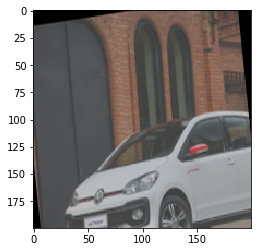

In [20]:
foto = np.reshape(data_img_output[100],(200,200,3))
plt.imshow(foto)